In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import *

In [2]:
data=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
def bowler_stat(name,data):
    id_list=data['id'].unique()
    content={} #content will be a dictionary of list with 0-runs 1-wickets 2-balls
    for Id in id_list:
        balls=data.loc[data.id.isin([Id]) & data.bowler.isin([name]) & ~data.extras_type.isin(['wides','noballs','penalty'])].shape[0]
        if balls==0:
            continue
        run=data.loc[data.id.isin([Id]) & data.bowler.isin([name]) & data.extras_type.isin(['wides','noballs','penalty'])]['extra_runs'].sum()
        run=run+data.loc[data.id.isin([Id]) & data.bowler.isin([name])]['batsman_runs'].sum()
        wickets=data.loc[ data.id.isin([Id]) & data.bowler.isin([name]) & data.dismissal_kind.isin(['caught', 'bowled', 'lbw', 
           'stumped', 'caught and bowled', 'hit wicket'])].shape[0]
        content[Id]=[run,wickets,balls]
    return content

In [4]:
content=bowler_stat('SL Malinga',data)

In [5]:
len(content)

122

Text(0, 0.5, 'runs')

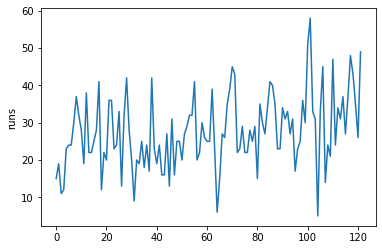

In [6]:
plt.plot(range(len(content)),[x[0] for a,x in content.items()])
plt.ylabel('runs')
#plt.plot(range(len(content)),[x[1] for a,x in content.items()])

## Economy Rate Analysis

Text(0, 0.5, 'economy_rate')

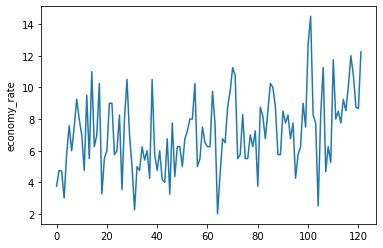

In [7]:
plt.plot(range(len(content)),[x[0]/x[2]*6 for a,x in content.items()])
plt.ylabel('economy_rate')

In [8]:
economy_rate=[x[0]/x[2]*6 for a,x in content.items()]
print(mean(economy_rate))
print(stdev(economy_rate))

7.122086813287999
2.3740347468109864


(array([ 4., 10., 19., 28., 22., 19., 10.,  6.,  3.,  1.]),
 array([ 2.  ,  3.25,  4.5 ,  5.75,  7.  ,  8.25,  9.5 , 10.75, 12.  ,
        13.25, 14.5 ]),
 <BarContainer object of 10 artists>)

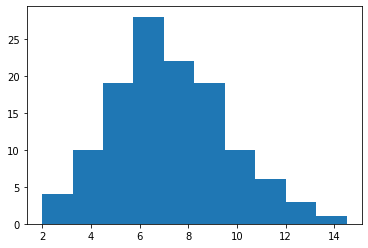

In [9]:
plt.hist(economy_rate,bins=10)

## Wickets

Text(0, 0.5, 'no_of_wickets')

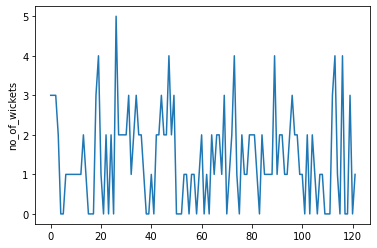

In [10]:
wickets=[x[1] for a,x in content.items()]
plt.plot(range(len(wickets)),wickets)
plt.ylabel('no_of_wickets')

In [11]:
print(sum(wickets))

170


(array([31., 39., 33., 12.,  6.,  1.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

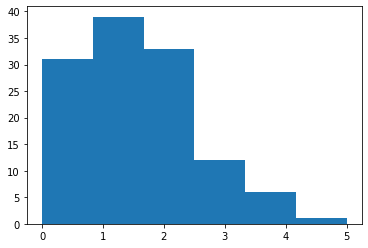

In [12]:
plt.hist(wickets,bins=6)

Text(0, 0.5, 'average')

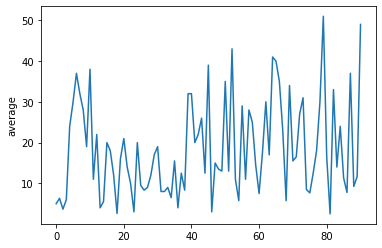

In [13]:
z=[]
for a,x in content.items():
    if x[1]!=0:
        z.append(x[0]/x[1])
plt.plot(range(len(z)),z)
plt.ylabel('average') #Note average is calculated matchwise and only if the person has taken atleast one wicket

# __Strike Rate__


In [28]:
wickets=[x[1] for a,x in content.items()]
balls = [x[2] for a,x in content.items()]
strike_rate = sum(balls)/sum(wickets)
print(strike_rate)

16.629411764705882


# __Bowling Average__

In [29]:
runs = [x[0] for a,x in content.items()]
wickets = [x[1] for a,x in content.items()]
bowling_average = sum(runs)/sum(wickets)
print(bowling_average)

19.823529411764707


# __4 or greater Wicket Hauls__

In [30]:
wickets=[x[1] for a,x in content.items()]
count = 0
for wicket in wickets:
    if(wicket>=4):
        count += 1
print(count)

7
